# Problem 1: Extending the Lady Tasting Tea

The problem is given as below:

<i>
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.
</i>


<i>
Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.
</i>

<i>
In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.
</i>

### 1) Exact probability (combinatorics)

If someone is guessing, they are effectively choosing **4 cups out of 12**.

- Total possible guesses: \(\binom{12}{4}\)
- Only **1** of those guesses is perfectly correct

So:
\[
P(\text{all 4 correct}) = \frac{1}{\binom{12}{4}}
\]




In [1]:
import math

n_cups = 12
milk_first = 4

total_guesses = math.comb(n_cups, milk_first)
p_all_correct = 1 / total_guesses

total_guesses, p_all_correct


(495, 0.00202020202020202)

### 2) Simulation check (Monte Carlo)

We simulate:
1. The **true** set of milk-first cups (4 cups)
2. A random **guess** of 4 cups
3. Count how many cups overlap between guess and truth (0 to 4)

We repeat many times and estimate the probability of getting **all 4 correct**.


In [2]:
import numpy as np

rng = np.random.default_rng(42)

trials = 200_000
cups = np.arange(n_cups)

all_correct_count = 0
overlap_counts = np.zeros(milk_first + 1, dtype=int)  # index 0..4

for _ in range(trials):
    truth = set(rng.choice(cups, size=milk_first, replace=False))
    guess = set(rng.choice(cups, size=milk_first, replace=False))
    overlap = len(truth.intersection(guess))
    overlap_counts[overlap] += 1
    if overlap == milk_first:
        all_correct_count += 1

p_hat = all_correct_count / trials

p_all_correct, p_hat, overlap_counts


(0.00202020202020202, 0.00211, array([28254, 90225, 68126, 12973,   422]))

### 3) Visualise the overlap distribution

This shows how often the guess got **0, 1, 2, 3, or 4** cups correct.


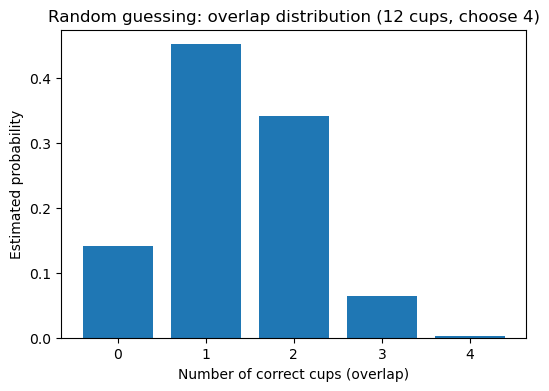

In [3]:
import matplotlib.pyplot as plt

x = np.arange(milk_first + 1)
y = overlap_counts / trials

plt.figure(figsize=(6, 4))
plt.bar(x, y)
plt.xticks(x)
plt.xlabel('Number of correct cups (overlap)')
plt.ylabel('Estimated probability')
plt.title('Random guessing: overlap distribution (12 cups, choose 4)')
plt.show()


### Conclusion

- There are **\(\binom{12}{4} = 495\)** possible ways to pick 4 cups from 12.
- Only **one** of those picks is perfectly correct.
- So the chance of getting **all 4 correct by guessing** is:
  - \(1/495 \approx 0.00202\) → about **0.2%**.

The simulation estimate should be close to that exact value.


## End

# Problem 2: Normal Distribution

The problemgiven:

<i>
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.
</i>